<a href="https://colab.research.google.com/github/yongxuantan/Python-for-atmospheric-science/blob/master/Statistical%20Methods%20with%20Widget%20Visual/Discrete_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Probability Distributions

We use `scipy.stats` to demonstrate the pdf, cdf, and sampling from several distribution families. First we import a few helpful libraries. 

In [1]:
from scipy.stats import bernoulli, binom, poisson
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

## 1. Bernoulli

Let's explore the basic methods for a Bernoulli random variable. 

In [2]:
print(bernoulli.pmf(0,p=.3))

0.7000000000000001


In [3]:
print(bernoulli.pmf(range(3),p=.3))

[0.7 0.3 0. ]


In [4]:
print(bernoulli.cdf([0,.5,1,1.5],p=.3))

[0.7 0.7 1.  1. ]


Next plot the pdf and cdf. For simplicity we are omitting labels and legend, we will see how to plot them in the next subsection. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


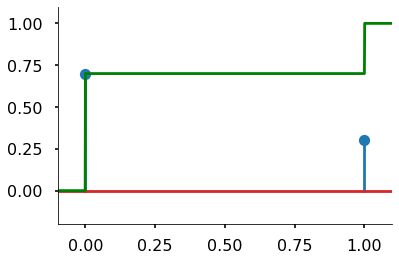

In [5]:
plt.stem([-0.2,0,1,1.2],bernoulli.pmf([-0.2,0,1,1.2],p=.3))
plt.plot(np.linspace(-0.1,1.1,1200),bernoulli.cdf(np.linspace(-0.1,1.1,1200),p=0.3),'g')
plt.xlim([-0.1,1.1])
plt.ylim([-0.2,1.1])
plt.show()

Next we generate and then plot Bernoulli samples.

In [6]:
print(bernoulli.rvs(size=10,p=0.3))

[1 0 0 0 0 0 1 0 0 0]


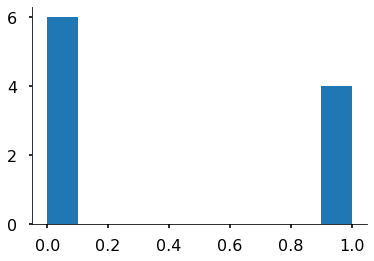

In [7]:
#plt.hist(bernoulli.rvs(size=10,p=0.3),normed=True)
plt.hist(bernoulli.rvs(size=10,p=0.3),density=True)
plt.show()

## 2. Binomial

You can calculate the pdf and cdf of the Binomial distribution the same way we did for Bernoulli, just replace `bernoulli.pmf` by `binom.pmf` etc. and including the appropriate arguments. Here is one example.

In [8]:
print(binom.rvs(size=50,n=20, p=0.4))

[ 8  8 10  5  9  8  2 11  6 10  9  7  9 12  9  7 11  7  7  9  8  5 12  7
  8  7  8  8 13  6 11  9  7 10  7  9  8 10  9  4  9 12  7  7  6  8 10  9
 13  7]


The following code plots the probability mass function (PMF) of $B_{p,n}$, the binomial distribution with parameters $p$ and $n$. It contains interactive sliders that you can use to vary $n$ over the interval $[0,30]$ and $p$ over the interval $[0, 1]$.

In [9]:
@widgets.interact(n=(0,30),p=(0.0,1.0),samples=(1,1000), continuous_update=False)
def plot_pmf(n, p,samples=100,histogram=False):
    '''
    Plot the probability mass function of Binom(n, p)
    '''
    k = np.arange(0, n + 1)
    P_binom = binom.pmf(k, n, p)
    # This plots a bar plot
    # plt.bar(k, P_binom,color='b')
    plt.plot(k, P_binom, '-o', color='r')
    if histogram:
        height,y = np.histogram(binom.rvs(size=samples,n=n,p=p),range=(0,n),bins=n+1,normed=True)
        plt.bar(k,height,color='r')
    plt.title('PMF of Bin(%i, %.2f)' % (n, p))
    plt.xlabel('k')
    plt.ylabel('$B_{20,0.3}(k)$')
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30), FloatSlider(value=0.5, description='p', ma…

## 3. Poisson

### 3.1 PMF
We follow the same procedure to plot the Poisson PMF.

In [10]:
@widgets.interact(n=(0,50),samples=(1,1000),λ=(0.0,30.0))
def f(n, λ, samples=100,histogram=False):
    k = np.arange(0, n+1)
    P_poisson = poisson.pmf(k, λ)
    plt.plot(k, P_poisson, '-o')
    if histogram:
        height,y = np.histogram(poisson.rvs(size=samples,mu=λ),range=(0,n),bins=n+1,normed=True)
        plt.bar(k,height,color='r')
    plt.title('PMF of Poisson(%i)' %λ)
    plt.xlabel('Number of Events')
    plt.ylabel('Probability of Number of Events')
    plt.show()

interactive(children=(IntSlider(value=25, description='n', max=50), FloatSlider(value=15.0, description='λ', m…

### 3.2 Poisson Approximation of the Binomial Distribution
Observe how well Poisson$(np)$ approximates Binomial$(n, p)$ for small values of $p$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

e = np.e
@widgets.interact(n=(2,1000),p=(0.0,.2,0.001),continuous_update=False)
def f(n, p):
    k = np.arange(0, n+1)
    x = np.linspace(0, n+1, 1000)
    λ = n*p
    stddev = λ**0.5
    P_poisson = poisson.pmf(k, λ)
    P_binom = binom.pmf(k, n, p)
    plt.plot(k, P_poisson, 'r', label = "Poisson(%0.2f)" %λ)
    plt.plot(k, P_binom, 'b-', label = "Bin(%i, %0.2f)" %(n,p))
    plt.title('Poisson Approximation of Binomial')
    plt.xlabel('n')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    print('|| P_Poisson - P_Binomial ||\u2081 = ',sum(abs(P_poisson-P_binom)))
   

interactive(children=(IntSlider(value=501, description='n', max=1000, min=2), FloatSlider(value=0.1, descripti…

## 4. Geometric Distribution
### 4.1 PMF and CDF

In [12]:
@widgets.interact(n=(1,200),p=(0.0,1.0))
def f(n, p, CDF=False):
    x = np.arange(1, n + 1)
    y = [((1 - p)**(z - 1)) * p for z in x]
    z = [(1 - (1 - p)**zz) for zz in x]
    plt.plot(x, y, 'o-', label='PDF')
    if CDF == True:
        plt.plot(x, z, 'ro-', label='CDF')
    if n == 1:
        plt.plot([0, 1], [p, p], 'b')
        plt.xticks([1])
    plt.xlabel('n')
    plt.ylabel('y')
    plt.title('PMF of Geometric(%0.2f)' % p, fontsize=20)
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=100, description='n', max=200, min=1), FloatSlider(value=0.5, descriptio…